<div class="usecase-title"><h1>Effect of Business Type/Residential Properties on Energy Consumption</h1></div>

<div class="usecase-authors"><b>Authored by: Mackenzie Gong
</b> </div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<header>
<h2>Scenario</h2>
<div> </div>




As a city planner or policy maker, I need to understand how different types of business and residential properties influence energy consumption patterns in Melbourne. This understanding will enable me to make informed decisions about energy efficiency initiatives, retrofitting projects, and sustainable urban development. By analyzing energy consumption data in conjunction with business types, residential properties, and employment statistics, I can identify high-consumption areas and develop targeted strategies to reduce energy use and promote sustainability.


<h2>Introduction</h2>

Energy consumption is a critical aspect of urban sustainability and economic efficiency. Cities around the world are striving to reduce their carbon footprints, improve energy efficiency, and promote sustainable living. Melbourne, being a vibrant and diverse city, has a wide range of business establishments, residential properties, and employment hubs, each contributing differently to the overall energy consumption.

This use case aims to analyze the effect of business types and residential properties on energy consumption in Melbourne using four key datasets:



**1. Block level energy consumption (modelled on building attributes) - 2021 projection - retrofit scenario**
https://data.melbourne.vic.gov.au/explore/dataset/block-level-energy-consumption-modelled-on-building-attributes-2021-projection-r/information/?location=13,-37.81338,144.96846&basemap=mbs-7a7333

Analysis:

- Analyze the overall energy consumption patterns across different blocks.
- Compare energy consumption between blocks with and without retrofitting.

Tasks:

- Load and preprocess the dataset to handle missing values and ensure consistency.
- Perform statistical analysis to identify blocks with the highest and lowest energy consumption.
- Visualize energy consumption patterns using heatmaps and bar charts.

**2. Floor space per space use for blocks**

https://data.melbourne.vic.gov.au/explore/dataset/floor-space-by-use-by-block/information/


Analysis:

- Investigate how the floor space dedicated to different uses (e.g., residential, commercial) affects energy consumption.
- Correlate floor space data with energy usage to identify high-consumption uses.

Tasks:

- Integrate the floor space data with the energy consumption data using block identifiers.
- Perform regression analysis to explore the relationship between floor space and energy consumption.
- Create visualizations to compare energy consumption across different space uses.

**3. Business establishments per ANZSIC for blocks**

https://data.melbourne.vic.gov.au/explore/dataset/business-establishments-per-block-by-anzsic/information/

Analysis:
- Explore the impact of different types of businesses on energy consumption.
- Identify which business types are associated with higher energy usage.

Tasks:

- Merge the business establishments data with the energy consumption dataset.
- Conduct a categorical analysis to assess energy consumption across different ANZSIC codes.
- Use clustering techniques to group blocks with similar business types and analyze their energy usage patterns.

**4. Jobs per CLUE industry for blocks**
https://data.melbourne.vic.gov.au/explore/dataset/employment-by-block-by-clue-industry/information/

Analysis:
- Examine the relationship between employment density and energy consumption.
- Identify industries that contribute significantly to energy usage.

Tasks:

- Integrate the employment data with the energy consumption and business establishment datasets.
- Perform correlation analysis to study the impact of job density on energy consumption.
- Visualize the distribution of jobs and energy consumption across different blocks and industries.


**5. Blocks for Census of Land Use and Employment (CLUE)**
https://data.melbourne.vic.gov.au/explore/dataset/blocks-for-census-of-land-use-and-employment-clue/table/







At the end of this use case, you will be provided with a comprehensive learning experience in the following areas:

- Data Integration and Preparation
- Exploratory Data Analysis
- Statistical Analysis and Modelling
- Spatial Analysis
- Energy Efficiency and Sustainability Insights


***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```

# 1. Understand datasets

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# Load the CSV file into dataframe
# Read the column names and first 10 rows

folder_path = '/content/drive/My Drive/Colab Notebooks/'
csv_names = ['block-level-energy-consumption-modelled-on-building-attributes-2021-projection-r.csv',
            'floor-space-by-use-by-block.csv',
            'business-establishments-per-block-by-anzsic.csv',
            'employment-by-block-by-clue-industry.csv',
            'blocks-for-census-of-land-use-and-employment-clue.csv']

dataframes = []
for csv in csv_names:
    csv_path = folder_path + csv
    df = pd.read_csv(csv_path)
    dataframes.append(df)
    print("=========================")
    print(f"Dataset: {csv}")
    print(f'shape: {df.shape}')
    print(f'column names: {df.columns}')
    print()
    print('First 2 rows:')
    print(df.head(2))
    print()

Dataset: block-level-energy-consumption-modelled-on-building-attributes-2021-projection-r.csv
shape: (640, 3)
column names: Index(['Geo Point', 'Geo Shape', 'total'], dtype='object')

First 2 rows:
                                 Geo Point  \
0  -37.843406112352376, 144.98490735020218   
1   -37.84218330812017, 144.98515315955768   

                                           Geo Shape       total  
0  {"coordinates": [[[[144.98541694518966, -37.84...   68.776427  
1  {"coordinates": [[[[144.9855461804882, -37.842...  162.968659  

Dataset: floor-space-by-use-by-block.csv
shape: (12394, 41)
column names: Index(['Census year', 'Block ID', 'CLUE small area',
       'Commercial Accommodation', 'Common Area', 'Community Use',
       'Educational/Research', 'Entertainment/Recreation - Indoor',
       'Equipment Installation', 'Hospital/Clinic', 'House/Townhouse',
       'Institutional Accommodation', 'Manufacturing', 'Office',
       'Park/Reserve', 'Parking - Commercial Covered',
       '

<h2>Tasks and Outcomes<h2>

**dataset1:
block-level-energy-consumption-modelled-on-building-attributes-2021-projection-r.csv**

- Geo Point: Use df5 to map to the block ID and CLUE small area.
- Geo Shape: Retain to calculate the square meter area of the block.
- Total (Energy Consumption): Retain as the key value for analysis.

**dataset2: floor-space-by-use-by-block.csv**

- Block ID: Check for updates to the floor plan for the block and use the most recent one if available.
- CLUE: Retain.
- Land Use Type: Combine with df3 and df4, unify and merge columns related to business type, industry, and land use.


**dataset3: business-establishments-per-block-by-anzsic.csv**

- Block ID: Check for updates to the floor plan for the block and use the most recent one if available.
- CLUE: Retain.
- Business Type: Combine with df2 and df4, unify and merge columns related to business type, industry, and land use.

**dataset4: employment-by-block-by-clue-industry.csv**

- Block ID: Check for updates to the floor plan for the block and use the most recent one if available.
- CLUE: Retain.
- Industry: Combine with df2 and df3, unify and merge columns related to business type, industry, and land use.

**dataset5: blocks-for-census-of-land-use-and-employment-clue.csv**

- Use the geopoints in df1 to map to block ID and CLUE name.



<h2>Outcome for preprocessing data<h2>


**dataframe_1 (key: block_id)**

columns:
block id, CLUE small area, size(sqaured meter), energy consumption, jobs provided, commercial area(sq m), commerical establishments, residential area, {commerical type, commercial area(sq m), commerical establishments, job provided}

**dataframe_2 (key: land use/industry/business type)**

columns:
land use/industry, size, job, establishment, {block id: {size, establishment, job}, {CLUE area: {size, establishment, job}}


Potential insights from the datasets:
**bold text**
- The block/CLUE area with the highest and lowest energy consumption per square meter.
- The block/CLUE area with the most jobs provided per unit of energy consumption, and their associated business types.
- The average energy consumption per square meter and per establishment in each block/CLUE area.
- The dominant type(s) of business in each block/CLUE area.


# 2. Preprocessing

In [25]:
from shapely.geometry import Point, MultiPolygon, Polygon
from shapely.ops import transform
from geopy.distance import geodesic

import pyproj,ast


# Function to calculate the approximate area of a MultiPolygon, given a list of coordinates
def calculate_multipolygon_area(coords_list):
    '''
    #The coordinates should be in the format [[[longitude, latitude], ...], ...].
    '''

    # Create a list of Polygon objects from the coordinate list
    polygons = [Polygon(coords) for coords in coords_list]

    # Create a MultiPolygon object from the list of Polygons
    multipolygon = MultiPolygon(polygons)

    # use the pyproj library to handle the projection
    wgs84 = pyproj.CRS('EPSG:4326')
    utm = pyproj.CRS('EPSG:3395')  # WGS 84 / World Mercator

    # Define a function to project coordinates to the UTM system
    project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform

    # Project the MultiPolygon to the UTM system
    multipolygon_proj = transform(project, multipolygon)

    # Calculate the area in square meters
    area_m2 = multipolygon_proj.area

    return area_m2


# Function to verify whether a geo point is within the range of a multipolygon area
def verify_point_in_multipolygon(point_coords, multipolygon_coords):
    """
    Check if a point is within a MultiPolygon area.
    """
    lat_point, lon_point = map(float, point_coords.split(", "))
    point = Point(lon_point, lat_point)  # the order: (longitude, latitude)

    polygons = [Polygon([(lon, lat) for lon, lat in polygon]) for polygon in multipolygon_coords]
    multipolygon = MultiPolygon(polygons)

    # Check if the point is within the multipolygon
    is_within = point.within(multipolygon)

    return is_within


# Convert a dictionary-like string to dictionary
def convert_to_dict(dict_string):
    try:
        # Use ast.literal_eval to safely evaluate the string
        result_dict = ast.literal_eval(dict_string)
        return result_dict
    except Exception as e:
        print(f"Error: {e}")
        return None


def update_cencus_year(df):
    df_output = pd.DataFrame(columns=df.columns)

    seen_dic = {}
    seen_block = []
    new_df_index = 0

    for n,row in df.iterrows():
        if int(row['Census year']) < 2022:

            if row['Block ID'] not in seen_block:
                df_output.loc[new_df_index] = row

                seen_dic[row['Block ID']] = {'year':row['Census year'],'index':new_df_index}
                seen_block.append(row['Block ID'])
                new_df_index += 1

            else:
                if seen_dic[row['Block ID']]['year'] < row['Census year']:
                    index_to_replace = seen_dic[row['Block ID']]['index']
                    df_output.loc[index_to_replace] = row
                    seen_dic[row['Block ID']]['year'] = row['Census year']

    return df_output

In [66]:
# Process information in df1 and df5

df_1 = dataframes[0]
df_5 = dataframes[4]

block_id = []
clue = []
area = []
total = []
geo_point = []

for index_in_1, row_in_1 in df_1.iterrows():
    point = row_in_1['Geo Point']
    area_1 = calculate_multipolygon_area(convert_to_dict(row_in_1['Geo Shape'])['coordinates'][0])
    found = 0
    for index_in_5, row_in_5 in df_5.iterrows():
        poly_coords = convert_to_dict(row_in_5['Geo Shape'])['coordinates']
        #poly_coords = [row_in_5['Geo Shape'].split("type")[0][:-3].split(": ")[1]]
        result = verify_point_in_multipolygon(point, poly_coords)
        if result == True:
            block_id.append(row_in_5['block_id'])
            geo_point.append(point)
            clue.append(row_in_5['clue_area'])
            total.append(row_in_1['total'])
            area.append(area_1)
            found += 1
            break

    if found == 0:
        print(f'Not found! Row:  {index_in_1+1}')


Not found! Row:  16


In [67]:
# Merge the location with the same block_id

seen_id = []

geo_point_cleaned = []
block_id_cleaned = []
clue_cleaned = []
area_cleaned = []
total_cleaned = []

for n,id in enumerate(block_id):
    if id not in seen_id:
        seen_id.append(id)
        geo_point_cleaned.append(geo_point[n])
        block_id_cleaned.append(id)
        clue_cleaned.append(clue[n])
        area_cleaned.append(area[n])
        total_cleaned.append(total[n])
    else:
        first_index = seen_id.index(id)
        area_cleaned[first_index] += area[n]
        total_cleaned[first_index] += total[n]

In [26]:
# Process dataset 2,3,4
# Only keep the census data for year 2021 (or the year most close prior to 2021)

df_2 = dataframes[1]
df_3 = dataframes[2]
df_4 = dataframes[3]

df_2_recent = update_cencus_year(df_2)
df_3_recent = update_cencus_year(df_3)
df_4_recent = update_cencus_year(df_4)

print(len(df_2_recent.columns)-3)
print(len(df_3_recent.columns)-3)
print(len(df_4_recent.columns)-3)

print(df_2_recent.columns[3:])
print(df_3_recent.columns[3:])
print(df_4_recent.columns[3:])

<ipython-input-25-8bb515a26b40>:75: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_output.loc[new_df_index] = row
<ipython-input-25-8bb515a26b40>:75: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_output.loc[new_df_index] = row
<ipython-input-25-8bb515a26b40>:75: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavi

38
20
21
Index(['Commercial Accommodation', 'Common Area', 'Community Use',
       'Educational/Research', 'Entertainment/Recreation - Indoor',
       'Equipment Installation', 'Hospital/Clinic', 'House/Townhouse',
       'Institutional Accommodation', 'Manufacturing', 'Office',
       'Park/Reserve', 'Parking - Commercial Covered',
       'Parking - Commercial Uncovered', 'Parking - Private Covered',
       'Parking - Private Uncovered', 'Performances, Conferences, Ceremonies',
       'Private Outdoor Space', 'Public Display Area', 'Residential Apartment',
       'Retail - Cars', 'Retail - Shop', 'Retail - Showroom', 'Retail - Stall',
       'Sports and Recreation - Outdoor', 'Square/Promenade', 'Storage',
       'Student Accommodation', 'Transport', 'Transport/Storage - Uncovered',
       'Unoccupied - Under Construction',
       'Unoccupied - Under Demolition/Condemned',
       'Unoccupied - Under Renovation', 'Unoccupied - Undeveloped Site',
       'Unoccupied - Unused', 'Wholesale

In [68]:
# First
# get the information of the total number of certain block, regardless of the business type

jobs = []
establishments = []
commercial_space = []

for id in block_id_cleaned:

    for i in range(df_2_recent.shape[0]):
        if df_2_recent.loc[i, 'Block ID'] == id:
            if np.isnan(df_2_recent.loc[i, 'Total floor space in block']):
                add = 0
            else:
                add = int(df_2_recent.loc[i, 'Total floor space in block'])
            commercial_space.append(add)

    for i in range(df_3_recent.shape[0]):
        if df_3_recent.loc[i,'Block ID'] == id:
            if np.isnan(df_3_recent.loc[i,'Total establishments in block']):
                add = 0
            else:
                add = int(df_3_recent.loc[i,'Total establishments in block'])
            establishments.append(add)

    for i in range(df_4_recent.shape[0]):
        if df_4_recent.loc[i, 'Block ID'] == id:
            if np.isnan(df_4_recent.loc[i, 'Total jobs in block']):
                add = 0
            else:
                add = int(df_4_recent.loc[i, 'Total jobs in block'])
            jobs.append(add)



In [ ]:
# Create the cleaned dataframe and save

dict_key_blockid = {'block_id':block_id_cleaned,
                    'geo_point_coords':geo_point_cleaned,
                    'CLUE':clue_cleaned,
                    'block_area':area_cleaned,
                    'total_energy_consumption':total_cleaned,
                    'total_jobs':jobs,
                    'business_establishments':establishments}

df_blockid = pd.DataFrame(dict_key_blockid)
# Save the DataFrame to a CSV file
df_blockid.to_csv('/content/drive/My Drive/Colab Notebooks/blockid.csv', index=True)

In [61]:
df_blockid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/blockid.csv')

In [21]:
# Merge dataset 2,3,4 so that they could have same column names

'''
Merge all land use types/industries into 9 types:
 - retail: retail and wholesale shops
 - business: the tertiary sector such as information technology services
 - leisure: dining, accommodations, and indoor recreational activities
 - education: schools and research institutions
 - healthcare: private and public healthcare service
 - manufacture: construction and manufacturing
 - public_service: community service and other services usually operated by the government or other state-owned companies
 - farming: agriculture, forestry, animal husbandry, fishing, and mining
 - residence: private properties for residential purpose (including outdoor areas and parking)
'''

def merge_columns(df, original_list):
    output_keys = ['retail', 'business', 'leisure', 'education',
                   'healthcare','manufacture','public_service','farming','residence',
                   'non_residential']
    output_dict = {'block_id':[],
                   'retail': [], 'business': [], 'leisure':[], 'education': [],
                   'healthcare':[],'manufacture':[],'public_service':[],'farming':[],
                   'residence':[],'non_residential':[]}

    for index, row in df.iterrows():
        output_dict['block_id'].append(row['Block ID'])
        total_non_residence = 0

        for i in range(9):
            new_value = 0
            if len(original_list[i])>0:
                for industry in original_list[i]:
                    if row[industry] > 0:
                        new_value += row[industry]
            output_dict[output_keys[i]].append(new_value)

            if i < 8:
                total_non_residence += new_value

        output_dict['non_residential'].append(total_non_residence)

    output_df = pd.DataFrame(output_dict)

    return output_df


In [22]:
df_2_original_list = [['Retail - Cars','Retail - Shop','Retail - Showroom','Retail - Stall','Wholesale'],
                      ['Office', 'Performances, Conferences, Ceremonies','Institutional Accommodation', 'Workshop/Studio', 'Storage'],
                      ['Commercial Accommodation', 'Entertainment/Recreation - Indoor'],
                      ['Educational/Research',  'Student Accommodation'],
                      ['Hospital/Clinic'],
                      ['Manufacturing'],
                      ['Common Area', 'Community Use', 'Equipment Installation', 'Park/Reserve',
                       'Parking - Commercial Covered', 'Parking - Commercial Uncovered', 'Public Display Area',
                       'Sports and Recreation - Outdoor','Square/Promenade', 'Transport',  'Transport/Storage - Uncovered'],
                      [],
                      ['House/Townhouse', 'Private Outdoor Space',  'Residential Apartment', 'Parking - Private Covered', 'Parking - Private Uncovered'],
                      ]

df_3_original_list = [['Retail Trade', 'Wholesale Trade'],
                      ['Financial and Insurance Services', 'Information Media and Telecommunications',
                       'Professional, Scientific and Technical Services', 'Rental, Hiring and Real Estate Services'],
                      ['Accommodation and Food Services',  'Arts and Recreation Services'],
                      ['Education and Training'],
                      ['Health Care and Social Assistance'],
                      ['Construction', 'Manufacturing'],
                      ['Administrative and Support Services',  'Electricity, Gas, Water and Waste Services',
                       'Other Services',  'Public Administration and Safety','Transport, Postal and Warehousing'],
                      ['Mining', 'Agriculture, Forestry and Fishing'],
                      []
                      ]

df_4_original_list = [['Retail Trade', 'Wholesale Trade'],
                      ['Business Services', 'Finance and Insurance', 'Information Media and Telecommunications',
                       'Real Estate Services', 'Rental and Hiring Services'],
                      ['Accommodation','Arts and Recreation Services', 'Food and Beverage Services'],
                      ['Education and Training'],
                      ['Health Care and Social Assistance'],
                      ['Construction','Manufacturing'],
                      ['Admin and Support Services', 'Electricity, Gas, Water and Waste Services', 'Other Services',
                       'Public Administration and Safety', 'Transport, Postal and Storage'],
                      ['Agriculture and Mining'],
                      []
                      ]


df_floor_space_per_business = merge_columns(df_2_recent,df_2_original_list)
df_business_establishment_per_business = merge_columns(df_3_recent,df_3_original_list)
df_jobs_provided_per_business = merge_columns(df_4_recent,df_4_original_list)

In [ ]:
df_floor_space_per_business.to_csv('/content/drive/My Drive/Colab Notebooks/df_floor_space_per_business.csv', index=True)
df_business_establishment_per_business.to_csv('/content/drive/My Drive/Colab Notebooks/df_business_establishment_per_business.csv', index=True)
df_jobs_provided_per_business.to_csv('/content/drive/My Drive/Colab Notebooks/df_jobs_provided_per_business.csv', index=True)

In [3]:
df_2_merged = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_floor_space_per_business.csv')
df_3_merged = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_business_establishment_per_business.csv')
df_4_merged = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_jobs_provided_per_business.csv')

In [ ]:
# Update the df_blockid dataframe with information related to business type in every block

# a. Add a column with commercial_area info to the df_blockid
for index, row in df_blockid.iterrows():
    for i, r in df_2_merged.iterrows():
        if r['block_id'] == row['block_id']:
            df_blockid.at[index, 'commercial_area'] = int(r['non_residential'])
            break

In [ ]:
# b. Update information about the plot_ratio, the business type with largest floor area for each block

plot_ratios = [] # plot ratio for the block
residential_area = []
business_type_largest_floor_area = []
business_type_2largest_floor_area = []
detailed_business_info = []
energy_consumption_per_sqm = []

for i, r in df_blockid.iterrows():

    for index, row in df_2_merged.iterrows():
        if row['block_id'] == r['block_id']:
            plot_ratio = None
            unit_energy = None

            if (int(r['commercial_area']) + int(row['residence'])) > 0:
                plot_ratio = (int(r['commercial_area']) + int(row['residence']))/int(r['block_area'])
                unit_energy = int(r['total_energy_consumption'])/(int(r['commercial_area']) + int(row['residence']))

            plot_ratios.append(plot_ratio)
            energy_consumption_per_sqm.append(unit_energy)

            residential_area.append(row['residence'])

            subset = row.iloc[2:-1]
            numeric_subset = pd.to_numeric(subset, errors='coerce')
            if (numeric_subset == 0).all():
                max_col = None
                second_max_col = None
            else:
                # Sort the numeric values in descending order
                sorted_subset = numeric_subset.sort_values(ascending=False)
                # Get the column names for the max and second max value
                max_col = sorted_subset.index[0]
                second_max_col = sorted_subset.index[1] if len(sorted_subset) > 1 else None
            business_type_largest_floor_area.append(max_col)
            business_type_2largest_floor_area.append(second_max_col)

            # Save detailed business info in a dictionary
            # Filtering out zeros
            business_details = {col: val for col, val in numeric_subset.items() if val != 0}
            # Sorting by value in descending order
            sorted_business_details = dict(sorted(business_details.items(), key=lambda item: item[1], reverse=True))
            sorted_string = ', '.join([f"{col}: {int(val)}" for col, val in sorted_business_details.items()])
            detailed_business_info.append(sorted_string)
            break

df_blockid['energy_consumption_per_sqm'] = energy_consumption_per_sqm
df_blockid['plot_ratio'] = plot_ratios
df_blockid['residential_area'] = residential_area
df_blockid['business/residence_with_largest_floor_area'] = business_type_largest_floor_area
df_blockid['business/residence_with_second_largest_floor_area'] = business_type_2largest_floor_area
df_blockid['detailed_business_info'] = detailed_business_info

In [ ]:
# Save the updated DataFrame to a new CSV file
df_blockid.to_csv('/content/drive/My Drive/Colab Notebooks/blockid_final.csv', index=True)

In [56]:
df_blockid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/blockid_final.csv')

In [ ]:
#

business_dict = {'business':['retail', 'business', 'leisure', 'education',
                             'healthcare','manufacture','public_service','farming'],
                 'area':[],
                 'establishments':[],
                 'jobs':[]}

for index, row in df_2_merged.iterrows():
    if int(row['block_id']) == 0:
        business_dict['area'].append(int(row['retail']))
        business_dict['area'].append(int(row['business']))
        business_dict['area'].append(int(row['leisure']))
        business_dict['area'].append(int(row['education']))
        business_dict['area'].append(int(row['healthcare']))
        business_dict['area'].append(int(row['manufacture']))
        business_dict['area'].append(int(row['public_service']))
        business_dict['area'].append(int(row['farming']))
    '''
    else:
        blockid = row['block_id']
        if int(row['non_residential']) > 0:
            #block_detail = {}
            #block_detail[blockid] = {} #'area':0, 'establishment':0,'jobs':0
            for i in range(8):
                if int(row[i+2]) > 0:
                    block_detail_dict[i] = {}


        if row['block_id'] not in block_detail_dict.keys():
            block_detail_dict['block_id'] = i
    '''

for index, row in df_3_merged.iterrows():
    if int(row['block_id']) == 0:
        business_dict['establishments'].append(int(row['retail']))
        business_dict['establishments'].append(int(row['business']))
        business_dict['establishments'].append(int(row['leisure']))
        business_dict['establishments'].append(int(row['education']))
        business_dict['establishments'].append(int(row['healthcare']))
        business_dict['establishments'].append(int(row['manufacture']))
        business_dict['establishments'].append(int(row['public_service']))
        business_dict['establishments'].append(int(row['farming']))

for index, row in df_4_merged.iterrows():
    if int(row['block_id']) == 0:
        business_dict['jobs'].append(int(row['retail']))
        business_dict['jobs'].append(int(row['business']))
        business_dict['jobs'].append(int(row['leisure']))
        business_dict['jobs'].append(int(row['education']))
        business_dict['jobs'].append(int(row['healthcare']))
        business_dict['jobs'].append(int(row['manufacture']))
        business_dict['jobs'].append(int(row['public_service']))
        business_dict['jobs'].append(int(row['farming']))

df_business = pd.DataFrame(business_dict)

In [ ]:
# Save the updated DataFrame to a new CSV file
df_business.to_csv('/content/drive/My Drive/Colab Notebooks/df_business.csv', index=True)

# 3. Conclusions

- **Top 10 blocks having the most energy consumption**
  
  With total energy consumption, energy consumption per square meter, total business area, total residential area, plot ratio, dominant business (residential) types, and job provided

- **Rank of CLUE area having the most energy consumption**
  
  With total energy consumption, energy consumption per square meter, total business area, total residential area, plot ratio, dominant business (residential) types, and job provided

In [7]:
# Top 10 blocks having the most energy consumption

# Sort the df_blockid by 'total_consumption_energy' in descending order
df_blockid_sorted = df_blockid.sort_values(by='total_energy_consumption', ascending=False)
top_10_rows = df_blockid_sorted.head(10) # Select the top 10 rows

# Create a new DataFrame with the first and second columns
df_consumption_block = top_10_rows.iloc[:, [2,3,4,5,9,8,11,10,12,13,6]]

df_consumption_block = df_consumption_block.reset_index(drop=True)

df_consumption_block

,block_id,geo_point_coords,CLUE,block_area,commercial_area,business_establishments,plot_ratio,energy_consumption_per_sqm,residential_area,business/residence_with_largest_floor_area,total_energy_consumption
0,1105,"-37.820543759797125, 144.95157362804156",Docklands,1.055514e+05,628607.0,142,6.531970,0.187456,60849.0,business,129243.855334
1,1108,"-37.82060188283007, 144.94356668030292",Docklands,8.392720e+05,556708.0,193,1.233949,0.105651,478910.0,residence,109414.035901
2,85,"-37.81192302348487, 144.9634946202743",Melbourne (CBD),1.274177e+05,188742.0,327,1.604896,0.504922,15749.0,business,103252.737900
3,931,"-37.7892167827868, 144.94576626751976",Parkville,3.214101e+06,780444.0,73,0.243087,0.131650,861.0,public_service,102859.181812
4,1103,"-37.81661182283469, 144.94755979560415",Docklands,1.927410e+05,324046.0,74,2.349626,0.171680,128821.0,public_service,77748.024510
5,920,"-37.79806131062135, 144.95551567850964",Parkville,1.343606e+05,201252.0,73,1.497857,0.384110,0.0,healthcare,77303.399540
6,804,"-37.82479985382958, 144.95225947620676",Southbank,4.761527e+05,187531.0,206,0.584423,0.265282,90743.0,residence,73821.028770
7,870,"-37.84662688494784, 144.98213235773974",Melbourne (Remainder),1.970089e+05,63415.0,16,0.321890,1.062556,0.0,education,67382.079410
8,37,"-37.813878346640784, 144.96999119790695",Melbourne (CBD),3.072287e+04,214021.0,148,7.152171,0.284287,5708.0,business,62466.116510
9,78,"-37.80921780870889, 144.97065341890882",Melbourne (CBD),3.075255e+04,256002.0,58,9.526762,0.207849,36965.0,business,60893.482730


**Conclusions**

Land use for **business** (including commercial and office properties in the tertiary sector, such as those used for information technology services), **public services** (such as community services and other functions typically managed by government or state-owned entities), **health care**, and **educational facilities** appear to be the major contributors to energy consumption in the city of Melbourne.

**Block Analysis**

- **Docklands (block ID 1105)**

  This block stands out with the highest total energy consumption at 129,243.
  
  This high energy usage is reflective of its large commercial area of 628,607 sqm and a significant number of jobs (25,531), indicating a strong business presence. However, the energy consumption per square meter (sqm) in this block is relatively low at 0.1875 MWh/sqm, suggesting that despite the high total energy usage, the energy efficiency per unit area is relatively good.

- **Docklands (block ID 1108)**

  This block also shows substantial total energy consumption at 109,414, but with a much lower energy consumption per sqm of 0.1057.
  
  It has a more balanced distribution between commercial (556,708 sqm) and residential (478,910 sqm) areas, which likely contributes to the lower energy consumption per sqm.

- **Melbourne CBD (block ID 85)**
  
  Here presents a different scenario where the total energy consumption is 103,252.74, but the energy consumption per sqm is quite high at 0.5049 MWh/sqm. This indicates that the block, with its relatively small commercial area of 188,742 sqm, has high energy demands per unit area, possibly due to dense business activities concentrated in a smaller area.

- **Parkville (block ID 931)**

  Here shows a high total energy consumption of 102,859.18 MWh, with a significant focus on public service and healthcare sectors. The energy consumption per sqm is relatively low at 0.1317 MWh/sqm, despite having the largest commercial area (780,444 sqm) among the listed blocks. This suggests that the activities in Parkville may be more spread out or less energy-intensive per unit area.

- **Southbank (block ID 804)** and **Melbourne (Remainder, block ID 870)**

  There two have interesting profiles with moderate energy consumption but high energy consumption per sqm, especially in Melbourne (Remainder) where the energy consumption per sqm is notably high at 1.0626 MWh/sqm. This block, with a relatively small commercial area of 63,415 sqm, is characterized by healthcare (Alfred Hospital) and educational (Wesley College) sectors, likely driving the higher energy usage intensity.

In [ ]:
# Top 10 CLUE area having the most energy consumption

CLUE_area = list(set(df_blockid['CLUE'].tolist()))

total_energy = [0] * len(CLUE_area)
commercial_total = [0] * len(CLUE_area)
resident_total = [0] * len(CLUE_area)
area_total = [0] * len(CLUE_area)
plot_ratio_total = [0] * len(CLUE_area)
total_jobs = [0] * len(CLUE_area)
energy_per_sqm = [0] * len(CLUE_area)

business_name = ['retail', 'business', 'leisure', 'education',
                'healthcare','manufacture','public_service','farming','residence']
area_per_business = [[0] * len(business_name) for _ in range(len(CLUE_area))]

largest_floor_area_business_type = []
second_largest_floor_area_business_type = []

for index, row in df_blockid.iterrows():
    i_clue = CLUE_area.index(row['CLUE'])

    total_energy[i_clue] += int(row['total_energy_consumption'])
    commercial_total[i_clue] += int(row['commercial_area'])
    resident_total[i_clue] += int(row['residential_area'])
    area_total[i_clue] += int(row['block_area'])
    total_jobs[i_clue] += row['total_jobs']

    for i,r in df_2_merged.iterrows():
        business_list = []
        if (row['block_id'] == r['block_id']):
            subset = r.iloc[2:-1]
            numeric_subset = pd.to_numeric(subset, errors='coerce')
            if sum(numeric_subset) > 0:
                business_list = numeric_subset.tolist()
                for k in range(len(business_name)):
                    area_per_business[i_clue][k] += business_list[k]

            break

for n in range(len(plot_ratio_total)):
    plot_ratio_total[n] = (commercial_total[n] + resident_total[n]) / area_total[n]
    energy_per_sqm[n] = total_energy[n]/(commercial_total[n] + resident_total[n])

for li in area_per_business:
    max_index = li.index(max(li))
    li_copy = li[:]
    li_copy[max_index] = float('-inf')
    second_max_index = li.index(max(li_copy))
    largest_floor_area_business_type.append(business_name[max_index])
    second_largest_floor_area_business_type.append(business_name[second_max_index])

CLUE_dict = {'CLUE': CLUE_area,
             'total_energy_consumption': total_energy,
             'energy_consumption_per_sqm':energy_per_sqm,
             'commercial_area':commercial_total,
             'residential_area': resident_total,
             'plot_ratio': plot_ratio_total,
             'business/residence_with_largest_floor_area':largest_floor_area_business_type,
             'business/residence_with_second_largest_floor_area':second_largest_floor_area_business_type,
             'total_jobs':total_jobs}


In [ ]:
df_CLUE = pd.DataFrame(CLUE_dict)
df_CLUE.to_csv('/content/drive/My Drive/Colab Notebooks/df_CLUE.csv', index=True)

df_CLUE_sorted = df_CLUE.sort_values(by='total_energy_consumption', ascending=False)
df_CLUE_sorted = df_CLUE_sorted.reset_index(drop=True)

df_CLUE_sorted

,CLUE,total_energy_consumption,energy_consumption_per_sqm,commercial_area,residential_area,plot_ratio,business/residence_with_largest_floor_area,business/residence_with_second_largest_floor_area,total_jobs
0,Melbourne (CBD),1840094,0.178120,7430202,2900440,3.996858,business,public_service,215597
1,Docklands,449178,0.107447,2511276,1669191,2.203639,residence,public_service,72917
2,Southbank,410564,0.135836,1357201,1665288,1.770434,residence,public_service,42283
3,Parkville,286033,0.151039,1433955,459812,0.351433,public_service,residence,27300
4,Carlton,214601,0.099739,1044045,1107590,0.664060,residence,public_service,14801
5,East Melbourne,174633,0.129506,552314,796144,0.606885,residence,public_service,20309
6,North Melbourne,170453,0.109800,428526,1123876,0.571867,residence,public_service,7460
7,Melbourne (Remainder),139236,0.093851,1263063,220527,0.478219,public_service,residence,16490
8,Port Melbourne,135552,0.129927,404737,638553,0.151826,residence,business,8491
9,West Melbourne (Industrial),82361,0.038042,1640692,524321,0.335936,public_service,residence,3016


**Conclusions**

Overall, the **Melbourne CBD** has the highest total energy consumption, significantly outpacing other areas. This is expected given its extensive commercial area and high job density, making it the economic hub of the city. The energy consumption per square meter varies across the regions, with Melbourne (Remainder) showing the lowest rate, indicating relatively lower energy intensity per unit area.

- Residential areas

  Residential areas tend to dominate in most regions except for the CBD, where commercial activities prevail. The presence of public service facilities also plays a crucial role in the energy consumption patterns of these regions.

- Effect of high plot ratio

  The top three CLUE areas with the highest energy consumption are Melbourne (CBD), Docklands, and Southbank. These areas not only lead in total energy consumption but also have some of the highest plot ratios, indicating dense urban development and a significant concentration of buildings relative to the land area.

# **4. Visualization**
- heatmap of the energy consumption by block
- heatmap of the energy consumption per building unit by block

**<h2> a. heatmap of the energy consumption by block</h2>**

<ipython-input-30-abb1be983140>:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


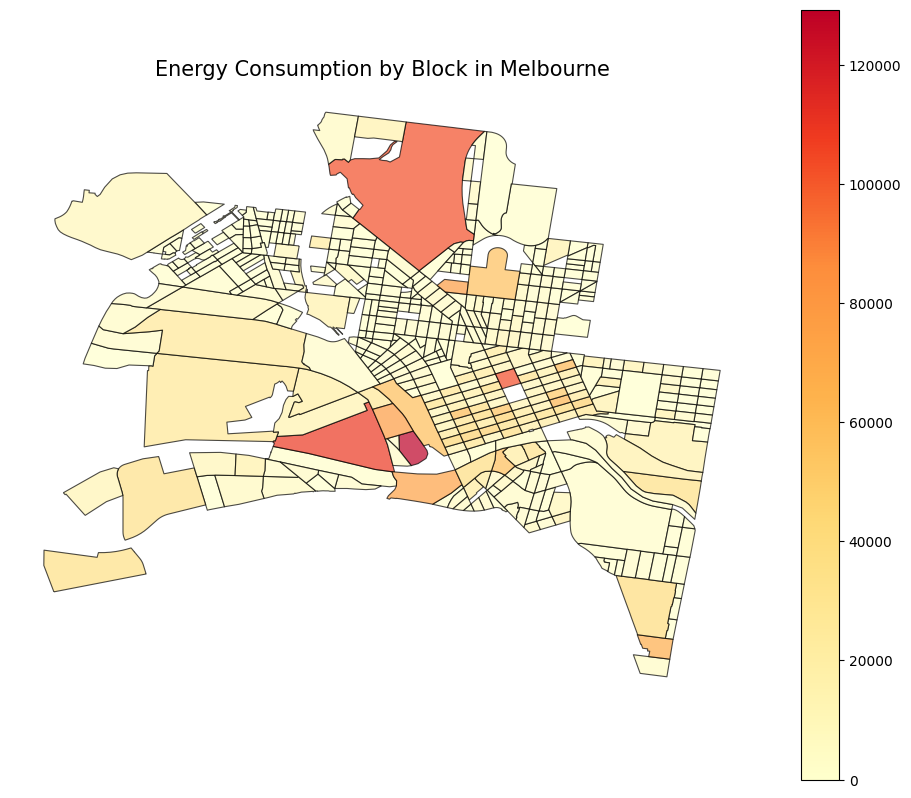

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

visual_1 = {'block_id':[],
            'block_coords':[],
            'energy_consumption':[]}

for i,r in df_blockid.iterrows():

    for index,row in df_5.iterrows():

        blockid = r['block_id']
        if blockid == row['block_id']:
            coords_list = convert_to_dict(row['Geo Shape'])['coordinates']
            polygons = [Polygon(coords) for coords in coords_list]
            multipolygon = MultiPolygon(polygons)

            #polygons = [Polygon(polygon[0]) for polygon in coords]
            #multi_polygon = MultiPolygon(polygons)
            visual_1['block_coords'].append(multipolygon)
            visual_1['block_id'].append(blockid)
            visual_1['energy_consumption'].append(r['total_energy_consumption'])

            break

df_visual_1 = pd.DataFrame(visual_1)

gdf_1 = gpd.GeoDataFrame(df_visual_1, geometry='block_coords')

cmap = LinearSegmentedColormap.from_list("energy_cmap",
                                         ["#ffffcc", "#ffeda0", "#fed976", "#feb24c", "#fd8d3c", "#f03b20", "#bd0026"])


# Plot the GeoDataFrame, using the 'energy_consumption' column to determine the color
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

gdf_1.plot(column='energy_consumption', cmap=cmap,
           linewidth=0.8, ax=ax,
           edgecolor='black', alpha=0.7)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gdf_1['energy_consumption'].min(),
                                                         vmax=gdf_1['energy_consumption'].max()))
sm._A = []
cbar = fig.colorbar(sm)

# Add title and labels
ax.set_title("Energy Consumption by Block in Melbourne", fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()

plt.show()


In [ ]:

import folium
from folium import Choropleth

# Convert to GeoJSON
gdf_1_json = gdf_1.to_json()

# Create a base map
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12,tiles='Cartodb Positron')

# Add the GeoDataFrame to the map with a Choropleth layer
folium.Choropleth(
    geo_data=gdf_1_json,
    name="choropleth",
    data=gdf_1,
    columns=["block_id", "energy_consumption"],
    key_on="feature.properties.block_id",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total Energy Consumption",
).add_to(m)


# Add tooltips or labels
folium.GeoJson(
    gdf_1_json,
    style_function=lambda x: {
        'fillColor': '#ffffff00',  # Transparent color for tooltips
        'color': 'black',
        'weight': 0.5
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['block_id', 'energy_consumption'],
        aliases=['Block ID: ', 'Energy Consumption: '],
        localize=True
    )
).add_to(m)

# Save map as an HTML file
m.save('energy_consumption.html')

# Display the map
m


This heatmap represents the energy consumption by block in the city of Melbourne. The color gradient, ranging from light yellow to dark red, indicates varying levels of energy consumption across different blocks. Darker colors correspond to higher energy consumption.

<font color = 'red'>**Melbourne Zoo**, **Melbourne Central**, **Docklands Area**</font> with the darkest shades of red show highest energy consumption in terms of total of the block.

Followed by that, blocks with <font color = 'orange'> **University of Melbourne, Marvel Stadium, The Royal Melbourne Hospital, Melbourne Convention and Exhibition Centre**</font> also show notable high energy consumptions.

**<h2> b. heatmap of the energy consumption per square meter by block </h2>**

In [ ]:
visual_2 = {'block_id':[],
            'block_coords':[],
            'energy_consumption_per_sqm':[]}

for i,r in df_blockid.iterrows():

    for index,row in df_5.iterrows():

        blockid = r['block_id']
        if blockid == row['block_id']:
            coords_list = convert_to_dict(row['Geo Shape'])['coordinates']
            polygons = [Polygon(coords) for coords in coords_list]
            multipolygon = MultiPolygon(polygons)

            visual_2['block_coords'].append(multipolygon)
            visual_2['block_id'].append(blockid)
            visual_2['energy_consumption_per_sqm'].append(r['energy_consumption_per_sqm'])

            break

df_visual_2 = pd.DataFrame(visual_2)

gdf_2 = gpd.GeoDataFrame(df_visual_2, geometry='block_coords')

gdf_2_json = gdf_2.to_json()

m_2 = folium.Map(location=[-37.8136, 144.9631], zoom_start=12,tiles='Cartodb Positron')

# Add the GeoDataFrame to the map
folium.Choropleth(
    geo_data=gdf_2_json,
    name="choropleth",
    data=gdf_2,
    columns=["block_id", "energy_consumption_per_sqm"],
    key_on="feature.properties.block_id",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Energy Consumption per Square Meter",
).add_to(m_2)


# Add tooltips or labels
folium.GeoJson(
    gdf_2_json,
    style_function=lambda x: {
        'fillColor': '#ffffff00',  # Transparent color for tooltips
        'color': 'black',
        'weight': 0.5
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['block_id', 'energy_consumption_per_sqm'],
        aliases=['Block ID: ', 'Energy Consumption (per sqm): '],
        localize=True
    )
).add_to(m_2)


# Save map as an HTML file
m_2.save('energy_consumption_per_sqm_map.html')

# Display the map
m_2

# **5. Statistical Analysis to decide Relevant parameters**

- correlation matrix
- regression analysis
- tree-based model

<h2> a.Correlation Matrix</h2>

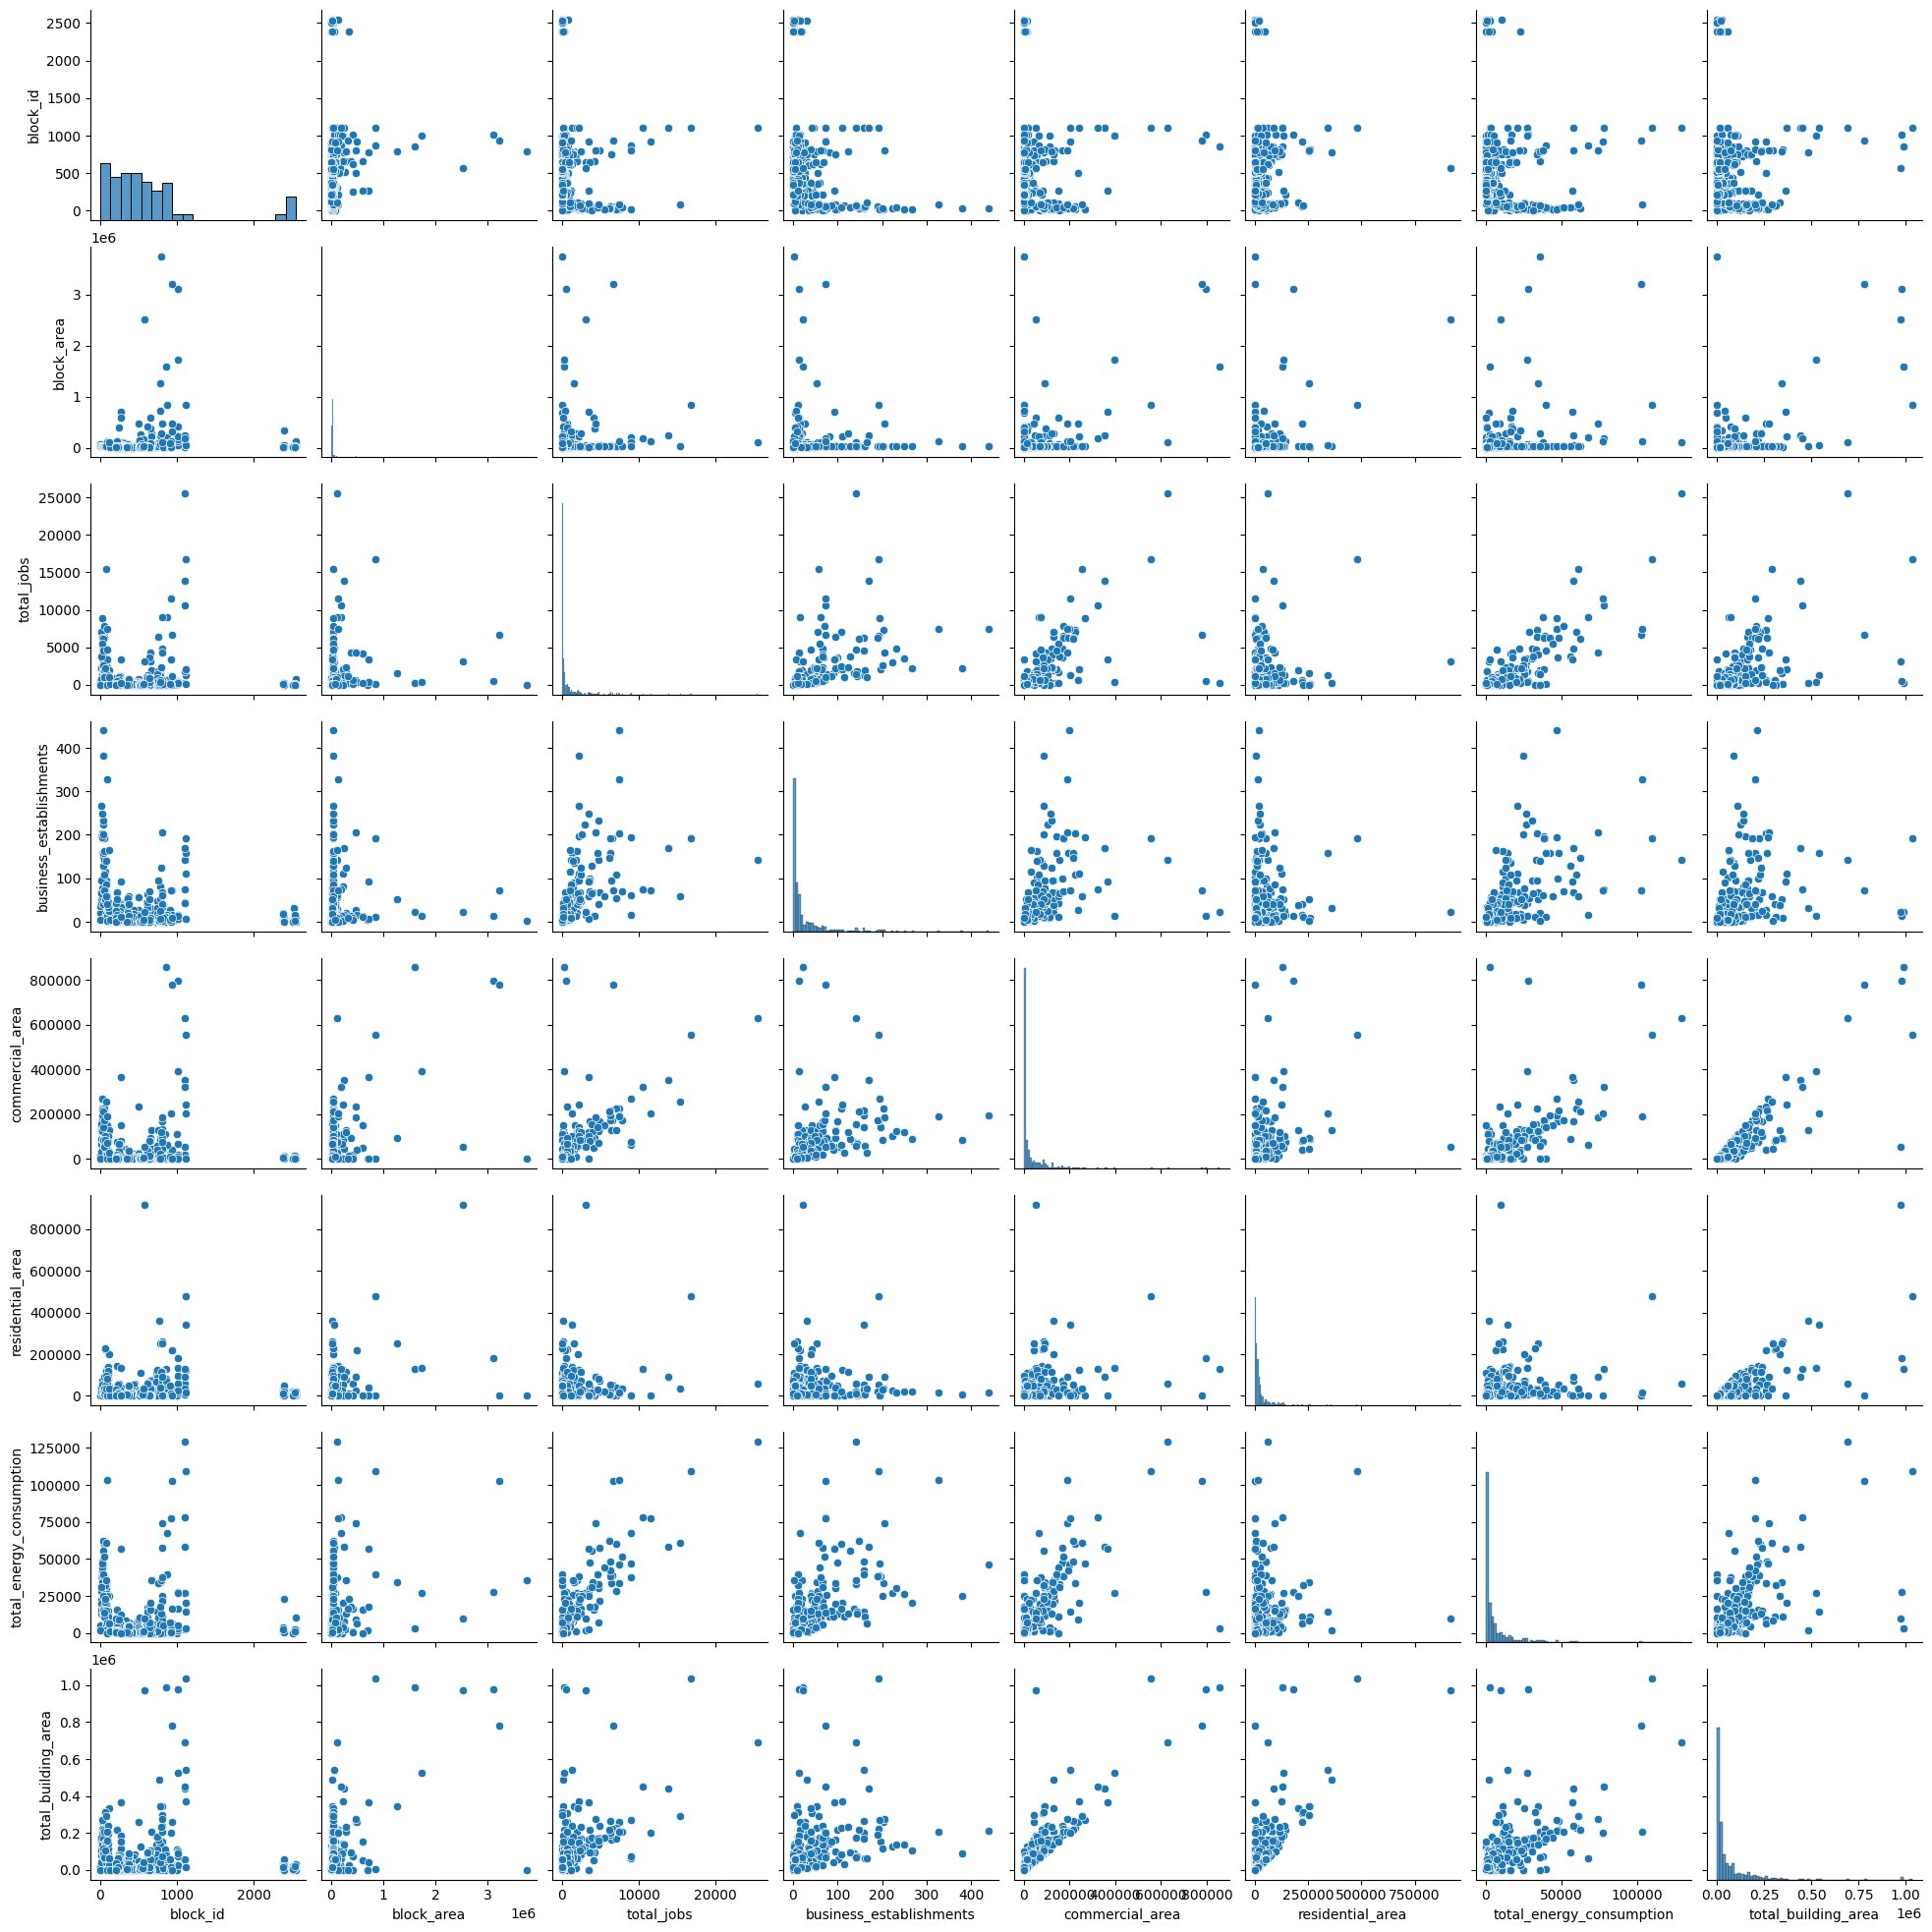

In [8]:
import seaborn as sns
from scipy.stats import pearsonr

from statsmodels.formula.api import ols

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



columns_to_select = ['block_id','CLUE','block_area','total_jobs', 'business_establishments',
                     'commercial_area','residential_area',
                     'business/residence_with_largest_floor_area','business/residence_with_second_largest_floor_area',
                     'total_energy_consumption']

df_visual_3 = df_blockid.loc[:, columns_to_select]
df_visual_3['total_building_area'] = df_visual_3['commercial_area'] + df_visual_3['residential_area']

# Visualize pairwise relationships
sns.pairplot(df_visual_3)
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


block_area                                                          0.308418
total_jobs                                                          0.867253
business_establishments                                             0.650255
commercial_area                                                     0.723720
residential_area                                                    0.223930
total_building_area                                                 0.634917
total_energy_consumption                                            1.000000
CLUE_Docklands                                                      0.287423
CLUE_East Melbourne                                                -0.063510
CLUE_Kensington                                                    -0.194382
CLUE_Melbourne (CBD)                                                0.408942
CLUE_Melbourne (Remainder)                                          0.050612
CLUE_North Melbourne                                               -0.157036

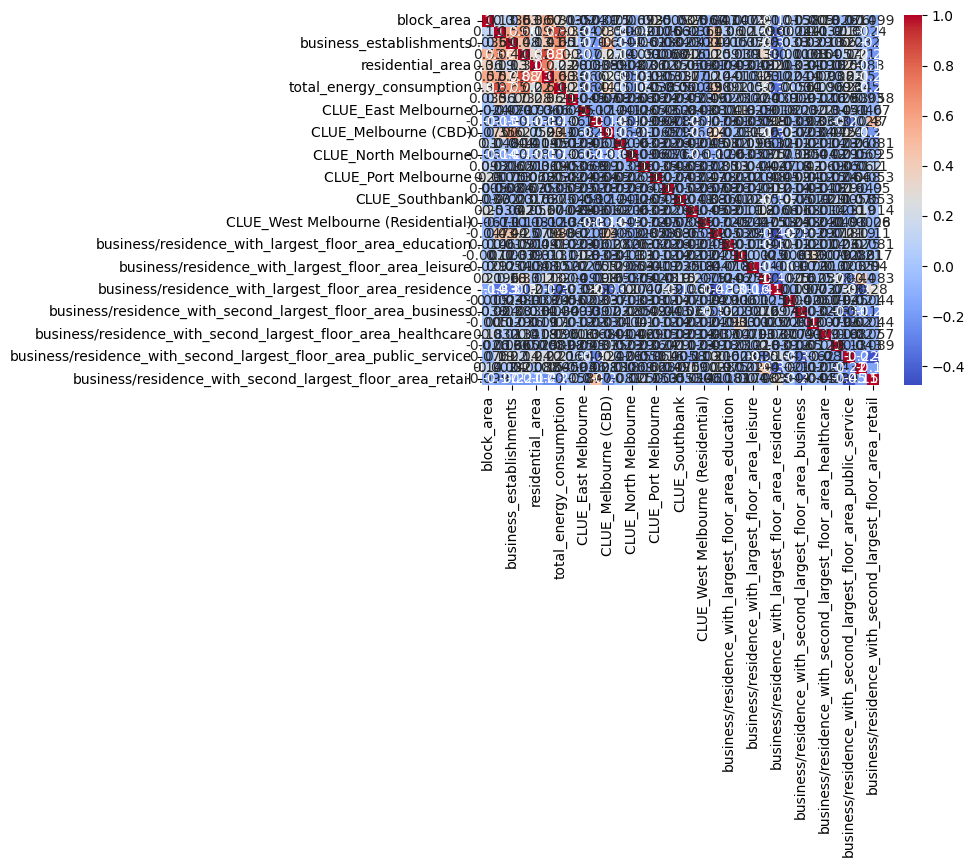

In [9]:
# Separate numerical and nominal columns
numerical_cols = ['block_area', 'total_jobs', 'business_establishments', 'commercial_area', 'residential_area', 'total_building_area','total_energy_consumption']
nominal_cols = ['CLUE', 'business/residence_with_largest_floor_area', 'business/residence_with_second_largest_floor_area']


# Fill missing values for numerical columns with 0
df_visual_3[numerical_cols] = df_visual_3[numerical_cols].fillna(0)

# Fill missing values for nominal columns with 'NA'
df_visual_3[nominal_cols] = df_visual_3[nominal_cols].fillna('NA')

encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
encoded_nominal = encoder.fit_transform(df_visual_3[nominal_cols])

# Create a DataFrame from encoded nominal columns
encoded_df = pd.DataFrame(encoded_nominal, columns=encoder.get_feature_names_out(nominal_cols))

# Concatenate the encoded columns with the original numeric columns
df_encoded = pd.concat([df_visual_3[numerical_cols], encoded_df], axis=1)

# Compute correlation matrix for the encoded dataframe
correlation_matrix_encoded = df_encoded.corr()

# Display correlation with 'total_energy_consumption'
print(correlation_matrix_encoded['total_energy_consumption'])

# Heatmap of correlations
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm')
plt.show()


**<font color = 'red'>Analysis</font>**

The correlation analysis conducted reveals insights into the relationships between various features and the total energy consumption.

**Strong Positive Correlations:**

- total_jobs (0.867):

  This feature shows the highest correlation with total energy consumption.

- commercial_area (0.724):

  Similarly, the commercial area has a significant positive correlation. This implies that blocks with larger commercial spaces are associated with higher energy consumption.

- business_establishments (0.650):

   The number of business establishments also shows a strong positive correlation.

- total_building_area (0.635):
  The total building area, encompassing both commercial and residential spaces, has a notable positive correlation.

**Moderate Positive Correlations:**

- block_area (0.308):
- business/residence_with_largest_floor_area_public_service (0.199):

**Negative Correlations**

- business/residence_with_largest_floor_area_residence (-0.346)

  This feature has a significant negative correlation. The presence of large residential floor areas in a block is inversely related to energy consumption. This might be due to residential areas typically having lower per-unit energy consumption compared to commercial spaces.

- business/residence_with_second_largest_floor_area_retail (-0.243): The second-largest floor area being used for retail shows a negative correlation. This could indicate that retail spaces, especially when not dominant, contribute less to the overall energy consumption compared to other types of spaces.

**Nominal Variables:**

- CLUE Variables
  The correlation values for different CLUE categories vary, with some showing very low or negative correlations. For example, CLUE_East Melbourne and CLUE_Southbank show slight negative correlations, while CLUE_Melbourne (CBD) has a positive correlation. This variability suggests that energy consumption patterns differ across various locations and are influenced by local factors not captured by CLUE alone.

- business/residence_with_largest_floor_area and business/residence_with_second_largest_floor_area

  Different types of establishments (e.g., business, healthcare, education) have varying degrees of correlation with energy consumption. Public service areas show some positive correlation, while other types like retail and residential have lower or negative correlations.

**Summary**

The analysis indicates that features related to the presence and extent of commercial activities, total building area, and the number of jobs have a substantial impact on total energy consumption. Conversely, larger residential areas and certain retail spaces are associated with lower energy consumption. The diverse correlations for nominal variables suggest that local factors and types of establishments can significantly influence energy usage patterns, and these should be considered in energy management and planning.

<h2> b. Regression Analysis </h2>

In [18]:
# Define the independent variables and the dependent variable
X = df_encoded.drop(columns=['total_energy_consumption'])
y = df_encoded['total_energy_consumption']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a constant to the model (intercept)
X_scaled = sm.add_constant(X_scaled)

# Fit the regression model
model = sm.OLS(y, X_scaled).fit()
print(model.summary())



                               OLS Regression Results                               
Dep. Variable:     total_energy_consumption   R-squared:                       0.847
Model:                                  OLS   Adj. R-squared:                  0.838
Method:                       Least Squares   F-statistic:                     86.27
Date:                      Sun, 08 Sep 2024   Prob (F-statistic):          1.41e-169
Time:                              01:41:44   Log-Likelihood:                -5047.5
No. Observations:                       497   AIC:                         1.016e+04
Df Residuals:                           466   BIC:                         1.029e+04
Df Model:                                30                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

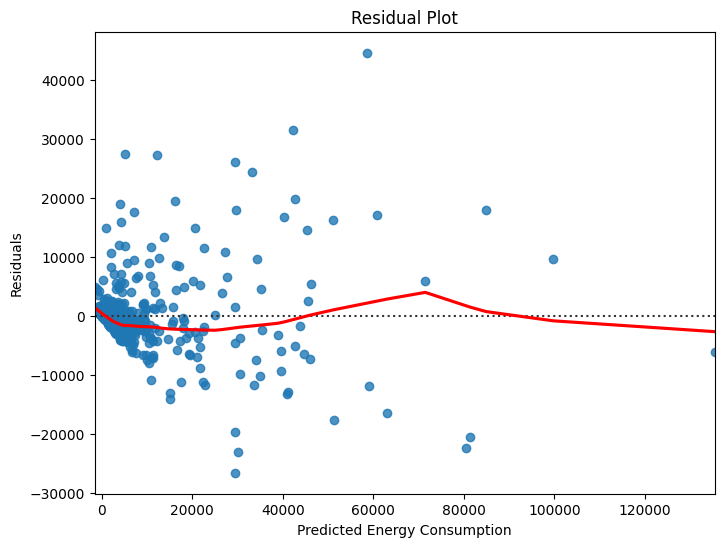

In [19]:
# Residual Plot: This plot
# helps to assess whether there are patterns in the residuals

# Predict using the model
y_pred = model.predict(X_scaled)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Energy Consumption")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


<ipython-input-20-daac39aa9d48>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


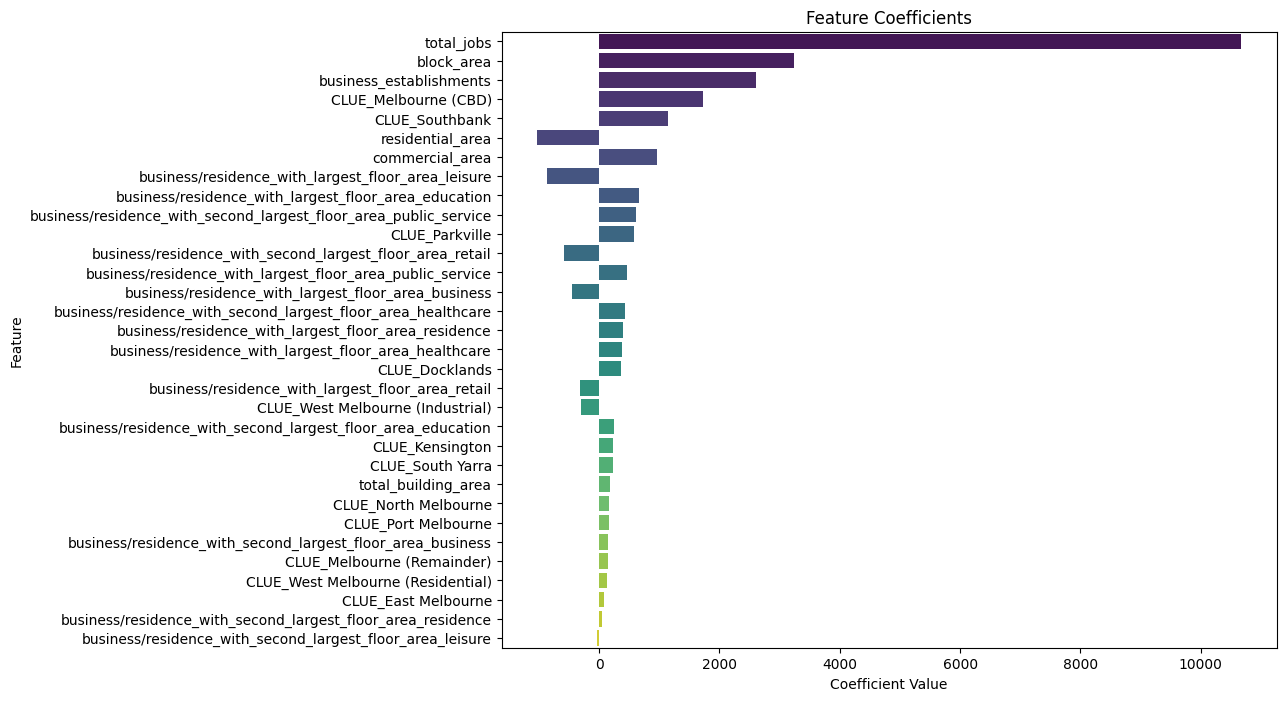

In [20]:
# Coefficient Plot
# visualize the importance and direction (positive or negative) of each feature

# Get the coefficients and feature names
coefficients = model.params[1:]  # Exclude the intercept (constant)
features = X.columns

# Create a DataFrame to hold feature names and coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients to get the most impactful features
coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('abs_coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title("Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

<font color = 'red'>**Analysis of the OLS Regression Results**</font>

The Ordinary Least Squares (OLS) regression analysis provides a detailed view of how various features influence total energy consumption.

**Model Summary:**
- **R-squared (0.847)**: This metric indicates that approximately 84.7% of the variability in total energy consumption can be explained by the model. This suggests a strong fit of the model to the data.

- **Adjusted R-squared (0.838)**: The adjusted R-squared value, which accounts for the number of predictors in the model, is slightly lower but still indicates a very good fit. It shows that the model is robust even after adjusting for the number of predictors.

- **F-statistic (86.27)**: This statistic tests the overall significance of the model. The high value, coupled with a very low p-value (1.41e-169), indicates that the model is statistically significant and the predictors as a group significantly explain the variation in energy consumption.

**Coefficients:**

The coefficients of each feature represent the change in total energy consumption for a one-unit change in the feature, holding all other variables constant.


- **`x1` to `x32`**: Each `x` variable corresponds to one of the features (e.g., block_area, total_jobs, etc.). The coefficients vary widely, reflecting the different impacts of each feature on total energy consumption.

  - **Significant Positive Coefficients**:
    - **`x1` (block_area) (8291.42)**: A positive coefficient indicates that larger block areas are associated with increased total energy consumption.
    - **`x2` (total_jobs) (3237.60)**: A strong positive coefficient suggests that more jobs in a block lead to significantly higher energy consumption, highlighting the substantial impact of employment on energy needs.
    - **`x3` (business_establishments)  (10,670.00)**: More business establishments are associated with higher energy consumption, reflecting the energy demands of commercial activities.
    - **`x10` (CLUE_Melbourne (CBD))  (1722.71)**: It shows that being in the Melbourne CBD area is associated with an increase in energy consumption.
    - **`x16` (CLUE_Southbank)  (1138.77)**:


  - **Significant Negative Coefficients**:
    - **`x5` (residential_area) (-1034.64)**: A negative coefficient indicates that larger residential areas are associated with lower total energy consumption, possibly due to lower per-unit energy usage in residential spaces compared to commercial ones.
    - **`x22` (business/residence_with_largest_floor_area_leisure) (-862.69)**: It suggests that blocks with the largest floor area dedicated to leisure activities (dining, accommodations, and indoor recreational activities) are associated with a decrease in total energy consumption.

  - **Other Variables**:
    - Many variables, such as `x6`, `x7`, `x8`, etc., have coefficients that are not statistically significant (p-values > 0.05), meaning their individual impact on total energy consumption is not strong or consistent.



#### **Model Diagnostics:**
- **Omnibus and Jarque-Bera Tests**: Both tests assess the normality of residuals. The significant p-values suggest that the residuals might not be perfectly normally distributed, which could affect the robustness of the model.
- **Durbin-Watson Statistic (1.954)**: This statistic checks for autocorrelation in residuals. A value close to 2 suggests that there is no significant autocorrelation.

**Summary**

The OLS regression analysis reveals that several features, such as block area, total jobs, and business establishments, significantly contribute to total energy consumption. The model fits the data well, as indicated by the high R-squared value. However, while some predictors show significant impacts, others do not significantly influence energy consumption. The results underscore the importance of employment and commercial activities in determining energy needs, while also suggesting that residential areas might have a relatively smaller effect on energy consumption.

<h2> C. Tree-based Model to assess Feature Importance </h2>

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# Remove the constant term
X = df_encoded.drop(columns=['total_energy_consumption'])
X_scaled = scaler.fit_transform(X)

# Fit a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_scaled, y)

# Get feature importances
importances = rf.feature_importances_
features = X.columns
feature_importances = dict(zip(features, importances))

print("Feature Importances:")
for feature, importance in feature_importances.items():
    print(f"{feature}: {importance}")

Feature Importances:
block_area: 0.08010505029206395
total_jobs: 0.628073833877747
business_establishments: 0.019274885426719665
commercial_area: 0.18179130416705644
residential_area: 0.012012509205804515
total_building_area: 0.05669635269911183
CLUE_Docklands: 0.0007982642392162535
CLUE_East Melbourne: 0.0019773603216487923
CLUE_Kensington: 0.0002212627018811315
CLUE_Melbourne (CBD): 0.0038249176282518925
CLUE_Melbourne (Remainder): 0.0010075237606477494
CLUE_North Melbourne: 0.0002198926983161889
CLUE_Parkville: 0.0014487965498236638
CLUE_Port Melbourne: 0.0002958320922620386
CLUE_South Yarra: 1.289417468478613e-05
CLUE_Southbank: 0.0008429380483565573
CLUE_West Melbourne (Industrial): 0.0002874011706887322
CLUE_West Melbourne (Residential): 6.732485493561134e-05
business/residence_with_largest_floor_area_business: 0.0016290151270198087
business/residence_with_largest_floor_area_education: 0.0015392759764827097
business/residence_with_largest_floor_area_healthcare: 8.134513846555872e

<font color = 'red'>**Analysis** </font>

The results of the Random Forest model reveal the importance of different features in predicting total energy consumption across various blocks. The feature importance values range from 0 to 0.628, with a higher value indicating a stronger influence on the model's predictions.

**Key Findings**

1. **Business Establishments (Importance: 0.628)**: This feature has the highest importance, suggesting that the number of business establishments in a block is the most significant predictor of total energy consumption.

2. **Residential Area (Importance: 0.185)**: The total area of residential properties also has a notable impact.

3. **Total Jobs (Importance: 0.080)**: The total number of jobs within a block also plays a role, albeit smaller.

4. **Commercial Area (Importance: 0.020)** and **Total Building Area (Importance: 0.011)**: These features are less influential but still contribute to the model's predictions.

5. **Nominal Variables (CLUE and Floor Area Features)**: Among the nominal variables, the influence is generally lower:
   - **CLUE_Docklands (Importance: 0.054)** has a higher importance compared to other CLUE categories, indicating that Docklands might have specific characteristics leading to higher energy consumption.
   - **CLUE_Melbourne (CBD) (Importance: 0.0002)** and **CLUE_Southbank (Importance: 0.0001)** have minimal importance, suggesting that these specific areas do not significantly differentiate energy consumption in this model.
   - **Business/Residence with Largest Floor Area - Leisure (Importance: 0.00016)** and other categories in this group also show very low importance, indicating that the type of business or residence with the largest floor area has little influence on energy consumption.

**Interpretation of Differences from previous statistical analysis**

Three methods here show different results, and main reason is that this tree-model based anlaysis captures <font color = 'red'>both linear and non-linear</font> relationships, while correlation matrix and OLS regression analysis simply assume linear relationships between the independent variables and the dependent variable.

Random Forest is more robust to multicollinearity compared to the other two. It selects features based on their ability to reduce variance in the target variable at each split in the tree, and since it is an ensemble method (using multiple trees), it can mitigate the issues caused by correlated features. It also excels at capturing interactions between features and non-linear effects. Besides, Random Forest is invariant to feature scaling because it uses thresholds to split data rather than coefficients. Thus, it can handle raw or scaled data effectively without altering the importance rankings.

For complex, non-linear interactions, the Random Forest model's indication of a significant **residential area** impact might be more accurate. Conversely, for linear relationships, the negative correlation and regression results may hold.

Practically, which result makes more sense depend on the nature of data and the underlying relationships. If the relationship between features and energy consumption seems to be complex and involves interactions, the tree-based model's conclusion might be more reliable. However, if the relationships are primarily linear and additive, the traditional methods like OLS regression might provide a clearer picture.

<ipython-input-17-98de952fabe4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='coolwarm')


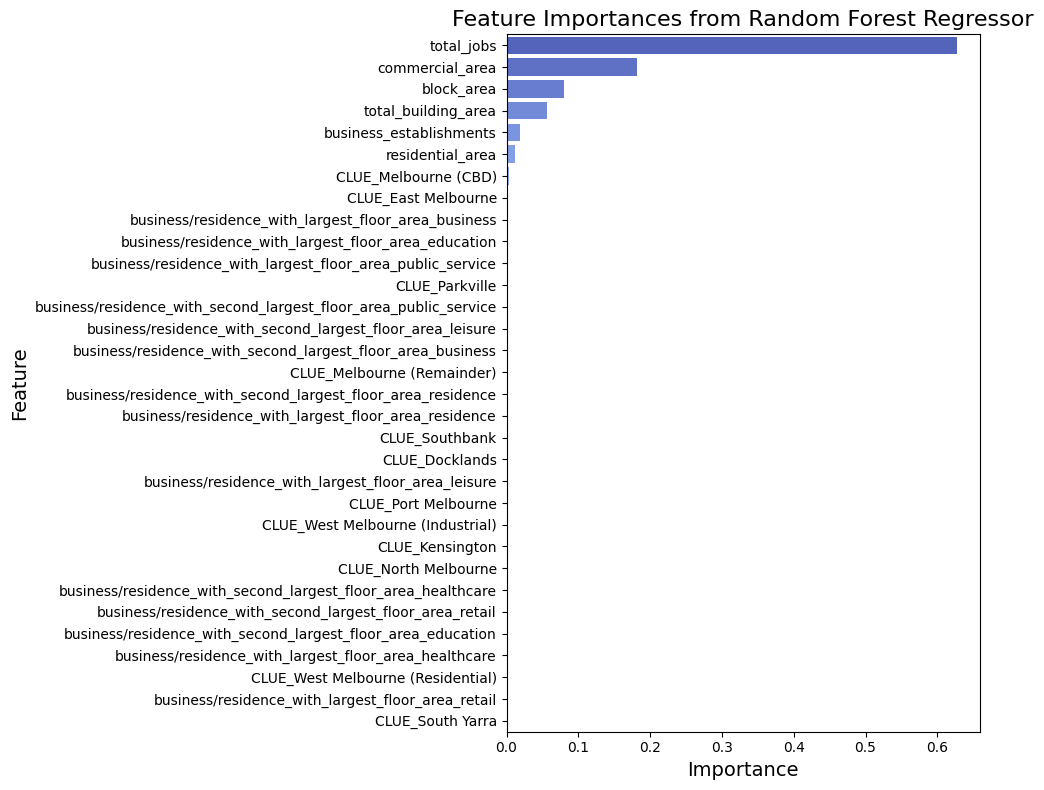

In [17]:
# visualization for feature importance

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='coolwarm')

# Add labels and title
plt.title('Feature Importances from Random Forest Regressor', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# **6. Test the Model**

In [51]:
# process the df_2, df_3, and _df_4 again, to get information from other years

def update_year(df, year):
    df_output = df[df['Census year'] == year]

    # make sure there
    block_counts = df_output['Block ID'].value_counts()

    # Filter years that appear more than once
    duplicate_id = block_counts[block_counts > 1]

    # Check if there are any duplicates for block id
    duliplicated = False
    if not duplicate_id.empty:
        duliplicated = True
        print("Block ID Duplicated!")

    return df_output

In [86]:
# year 2016
df_2_2016 = update_year(df_2, 2016)
df_3_2016 = update_year(df_3, 2016)
df_4_2016 = update_year(df_4, 2016)

# year 2014
df_2_2014 = update_year(df_2, 2014)
df_3_2014 = update_year(df_3, 2014)
df_4_2014 = update_year(df_4, 2014)

# year 2012
df_2_2012 = update_year(df_2, 2012)
df_3_2012 = update_year(df_3, 2012)
df_4_2012 = update_year(df_4, 2012)

df_list = [df_2_2016,df_3_2016,df_4_2016,
           df_2_2014,df_3_2014,df_4_2014,
           df_2_2012,df_3_2012,df_4_2012]


# merge columns in each dataframe as in the one for year 2021
df_2_2016_merged = merge_columns(df_2_2016, df_2_original_list)
df_3_2016_merged = merge_columns(df_3_2016, df_3_original_list)
df_4_2016_merged = merge_columns(df_4_2016, df_4_original_list)

df_2_2014_merged = merge_columns(df_2_2014, df_2_original_list)
df_3_2014_merged = merge_columns(df_3_2014, df_3_original_list)
df_4_2014_merged = merge_columns(df_4_2014, df_4_original_list)

df_2_2012_merged = merge_columns(df_2_2012, df_2_original_list)
df_3_2012_merged = merge_columns(df_3_2012, df_3_original_list)
df_4_2012_merged = merge_columns(df_4_2012, df_4_original_list)


In [100]:
# get the information of the total number of certain block, regardless of the business type
def get_columns_per_year(blockid_list, df2, df3, df4):

    jobs = []
    establishments = []
    commercial_space = []

    for id in blockid_list:
        for n,row in df2.iterrows():
            if row['Block ID'] == id:
                if np.isnan(row['Total floor space in block']):
                    add = 0
                else:
                    add = int(row['Total floor space in block'])
                commercial_space.append(add)
                break

        for n,row in df3.iterrows():
            if row['Block ID'] == id:
                if np.isnan(row['Total establishments in block']):
                    add = 0
                else:
                    add = int(row['Total establishments in block'])
                establishments.append(add)
                break

        for n,row in df4.iterrows():
            if row['Block ID'] == id:
                if np.isnan(row['Total jobs in block']):
                    add = 0
                else:
                    add = int(row['Total jobs in block'])
                jobs.append(add)
                break


    dict_key_blockid = {'block_id':block_id_cleaned,
                    'geo_point_coords':geo_point_cleaned,
                    'CLUE':clue_cleaned,
                    'block_area':area_cleaned,
                    #'total_energy_consumption':total_cleaned,
                    'total_jobs':jobs,
                    'business_establishments':establishments}


    df_blockid = pd.DataFrame(dict_key_blockid)

    return df_blockid


df_blockid_2016 = get_columns_per_year(block_id_cleaned,
                                       df_2_2016,
                                       df_3_2016,
                                       df_4_2016)

df_blockid_2014 = get_columns_per_year(block_id_cleaned,
                                       df_2_2014,
                                       df_3_2014,
                                       df_4_2014)

df_blockid_2012 = get_columns_per_year(block_id_cleaned,
                                       df_2_2012,
                                       df_3_2012,
                                       df_4_2012)

In [101]:
def update_block_info(df, df2_merged):
    # a. Add a column with commercial_area info to the df_blockid
    for index, row in df.iterrows():
        for i, r in df2_merged.iterrows():
            if r['block_id'] == row['block_id']:
                df.at[index, 'commercial_area'] = int(r['non_residential'])
                break

    # b. Update information about the plot_ratio, the business type with largest floor area for each block
    plot_ratios = [] # plot ratio for the block
    residential_area = []
    business_type_largest_floor_area = []
    business_type_2largest_floor_area = []
    detailed_business_info = []
    energy_consumption_per_sqm = []

    for i, r in df.iterrows():

        for index, row in df2_merged.iterrows():
            if row['block_id'] == r['block_id']:
                plot_ratio = None
                unit_energy = None

                if (int(r['commercial_area']) + int(row['residence'])) > 0:
                    plot_ratio = (int(r['commercial_area']) + int(row['residence']))/int(r['block_area'])

                plot_ratios.append(plot_ratio)
                energy_consumption_per_sqm.append(unit_energy)

                residential_area.append(row['residence'])

                subset = row.iloc[2:-1]
                numeric_subset = pd.to_numeric(subset, errors='coerce')
                if (numeric_subset == 0).all():
                    max_col = None
                    second_max_col = None
                else:
                    # Sort the numeric values in descending order
                    sorted_subset = numeric_subset.sort_values(ascending=False)
                    # Get the column names for the max and second max value
                    max_col = sorted_subset.index[0]
                    second_max_col = sorted_subset.index[1] if len(sorted_subset) > 1 else None
                business_type_largest_floor_area.append(max_col)
                business_type_2largest_floor_area.append(second_max_col)

                # Save detailed business info in a dictionary
                # Filtering out zeros
                business_details = {col: val for col, val in numeric_subset.items() if val != 0}
                # Sorting by value in descending order
                sorted_business_details = dict(sorted(business_details.items(), key=lambda item: item[1], reverse=True))
                sorted_string = ', '.join([f"{col}: {int(val)}" for col, val in sorted_business_details.items()])
                detailed_business_info.append(sorted_string)
                break

    df['plot_ratio'] = plot_ratios
    df['residential_area'] = residential_area
    df['business/residence_with_largest_floor_area'] = business_type_largest_floor_area
    df['business/residence_with_second_largest_floor_area'] = business_type_2largest_floor_area
    df['detailed_business_info'] = detailed_business_info


update_block_info(df_blockid_2016, df_2_2016_merged)
update_block_info(df_blockid_2014, df_2_2014_merged)
update_block_info(df_blockid_2012, df_2_2012_merged)


# Save the updated DataFrame to a new CSV file
df_blockid_2016.to_csv('/content/drive/My Drive/Colab Notebooks/blockid_2016.csv', index=True)
df_blockid_2014.to_csv('/content/drive/My Drive/Colab Notebooks/blockid_2014.csv', index=True)
df_blockid_2012.to_csv('/content/drive/My Drive/Colab Notebooks/blockid_2012.csv', index=True)

In [105]:
# separate numerical and nominal columns for each year

columns_to_select = ['block_id','CLUE','block_area','total_jobs', 'business_establishments',
                     'commercial_area','residential_area',
                     'business/residence_with_largest_floor_area','business/residence_with_second_largest_floor_area']

df_fit_2016 = df_blockid_2016.loc[:, columns_to_select]
df_fit_2016['total_building_area'] = df_fit_2016['commercial_area'] + df_fit_2016['residential_area']

df_fit_2014 = df_blockid_2014.loc[:, columns_to_select]
df_fit_2014['total_building_area'] = df_fit_2014['commercial_area'] + df_fit_2014['residential_area']

df_fit_2012 = df_blockid_2012.loc[:, columns_to_select]
df_fit_2012['total_building_area'] = df_fit_2012['commercial_area'] + df_fit_2012['residential_area']


numerical_cols = ['block_area', 'total_jobs', 'business_establishments', 'commercial_area', 'residential_area', 'total_building_area']
nominal_cols = ['CLUE', 'business/residence_with_largest_floor_area', 'business/residence_with_second_largest_floor_area']


# Fill missing values for numerical columns with 0
df_fit_2016[numerical_cols] = df_fit_2016[numerical_cols].fillna(0)
df_fit_2014[numerical_cols] = df_fit_2014[numerical_cols].fillna(0)
df_fit_2012[numerical_cols] = df_fit_2012[numerical_cols].fillna(0)

# Fill missing values for nominal columns with 'NA'
df_fit_2016[nominal_cols] = df_fit_2016[nominal_cols].fillna('NA')
df_fit_2014[nominal_cols] = df_fit_2014[nominal_cols].fillna('NA')
df_fit_2012[nominal_cols] = df_fit_2012[nominal_cols].fillna('NA')

encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
encoded_nominal_2016 = encoder.fit_transform(df_fit_2016[nominal_cols])
encoded_nominal_2014 = encoder.fit_transform(df_fit_2014[nominal_cols])
encoded_nominal_2012 = encoder.fit_transform(df_fit_2012[nominal_cols])

# Create a DataFrame from encoded nominal columns
encoded_df_2016 = pd.DataFrame(encoded_nominal_2016, columns=encoder.get_feature_names_out(nominal_cols))
encoded_df_2014 = pd.DataFrame(encoded_nominal_2014, columns=encoder.get_feature_names_out(nominal_cols))
encoded_df_2012 = pd.DataFrame(encoded_nominal_2012, columns=encoder.get_feature_names_out(nominal_cols))

# Concatenate the encoded columns with the original numeric columns
df_encoded_2016 = pd.concat([df_fit_2016[numerical_cols], encoded_df_2016], axis=1)
df_encoded_2014 = pd.concat([df_fit_2014[numerical_cols], encoded_df_2016], axis=1)
df_encoded_2012 = pd.concat([df_fit_2012[numerical_cols], encoded_df_2016], axis=1)

# Compute correlation matrix for the encoded dataframe
#correlation_matrix_encoded = df_encoded.corr()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [108]:
print(df_encoded_2016.shape)
print(df_encoded_2014.shape)
print(df_encoded_2012.shape)

(497, 32)
(497, 32)
(497, 32)


In [109]:
# Standardize the features, then predict the total_consumption value

scaler = StandardScaler()
X_scaled_2016 = scaler.fit_transform(df_encoded_2016)
X_scaled_2014 = scaler.fit_transform(df_encoded_2014)
X_scaled_2012 = scaler.fit_transform(df_encoded_2012)

# use the rf model from section 5/c
y_2016_pred = rf.predict(X_scaled_2016)
y_2014_pred = rf.predict(X_scaled_2014)
y_2012_pred = rf.predict(X_scaled_2012)

In [114]:
# Extract 'block_id' columns
block_id_2016 = df_blockid_2016[['block_id']]
block_id_2014 = df_blockid_2014[['block_id']]
block_id_2012 = df_blockid_2012[['block_id']]

# Convert prediction arrays to DataFrames
y_2016_pred_df = pd.DataFrame(y_2016_pred, columns=['prediction'])
y_2014_pred_df = pd.DataFrame(y_2014_pred, columns=['prediction'])
y_2012_pred_df = pd.DataFrame(y_2012_pred, columns=['prediction'])

# Combine with predictions
df_pred_2016 = pd.concat([block_id_2016, y_2016_pred_df], axis=1)
df_pred_2014 = pd.concat([block_id_2014, y_2014_pred_df], axis=1)
df_pred_2012 = pd.concat([block_id_2012, y_2012_pred_df], axis=1)

In [115]:
df_pred_2016

,block_id,prediction
0,869,559.217477
1,868,488.612068
2,864,915.327171
3,861,3120.160956
4,863,3637.859837
...,...,...
492,925,527.420278
493,903,4393.177178
494,570,22534.424995
495,274,6526.342589


In [119]:
print(y.mean())
print(df_pred_2016['prediction'].mean())
print(df_pred_2014['prediction'].mean())
print(df_pred_2012['prediction'].mean())

8291.415370684806
8454.01811254298
8511.968660375871
8894.908959061531
